In [2]:
#https://github.com/pomber/covid19
import numpy as np
import pandas as pd
import json, requests

import matplotlib.pyplot as plt
import datetime

In [227]:
df_data = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df_data['date'] = df_data['date'].astype('datetime64[ns]')

df_brasil = pd.read_csv('../data/brazil_corona19_data.csv', sep=',')
df_brasil['date'] = df_brasil['date'].astype('datetime64[ns]')

# df_regions = pd.read_csv('../COVID19_mobility/summary_reports/summary_report_regions.csv')
# df_full = pd.read_csv('../COVID19_mobility/summary_reports/summary_report.csv')
df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', low_memory=False)#?cachebust=722f3143b586a83f')
df.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation', 'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy', 'parks_percent_change_from_baseline':'parks','transit_stations_percent_change_from_baseline': 'transit_stations', 'workplaces_percent_change_from_baseline':'workplaces', 'residential_percent_change_from_baseline':'residential'}, inplace= True)
df['date'] = df['date'].astype('datetime64[ns]')

lastUpdate = df.date.max().date()
lastData = df_data.date.max().date()

# tomorrow = today + datetime.timedelta(days=1)

df

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
308322,ZW,Zimbabwe,NaN,NaN,2020-04-28,-52.0,-40.0,-36.0,-70.0,-54.0,35.0
308323,ZW,Zimbabwe,NaN,NaN,2020-04-29,-51.0,-39.0,-38.0,-69.0,-54.0,35.0
308324,ZW,Zimbabwe,NaN,NaN,2020-04-30,-49.0,-36.0,-37.0,-67.0,-53.0,35.0
308325,ZW,Zimbabwe,NaN,NaN,2020-05-01,-59.0,-42.0,-44.0,-74.0,-71.0,41.0


In [228]:
df[df['country_region']=='Brazil'].sub_region_1.unique()

array([nan, 'Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [229]:
df['mean'] = df.loc[:, ['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces']].mean(axis=1)

countries = df.country_region_code.unique()
for country in countries:
    regions = df[df['country_region_code']==country].sub_region_1.unique()

    for region in regions:
        df.loc[(df['country_region_code']==country )| (df.sub_region_1 == region), 'avg7_mobility'] = df[df.sub_region_1 == region]['mean'].rolling(window=7).mean().replace([np.inf, -np.inf], 0).replace([np.nan], 0).astype('int')

df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,mean,avg7_mobility
308322,ZW,Zimbabwe,NaN,NaN,2020-04-28,-52.0,-40.0,-36.0,-70.0,-54.0,35.0,-50.4,NaN
308323,ZW,Zimbabwe,NaN,NaN,2020-04-29,-51.0,-39.0,-38.0,-69.0,-54.0,35.0,-50.2,NaN
308324,ZW,Zimbabwe,NaN,NaN,2020-04-30,-49.0,-36.0,-37.0,-67.0,-53.0,35.0,-48.4,NaN
308325,ZW,Zimbabwe,NaN,NaN,2020-05-01,-59.0,-42.0,-44.0,-74.0,-71.0,41.0,-58.0,NaN
308326,ZW,Zimbabwe,NaN,NaN,2020-05-02,-55.0,-39.0,-39.0,-69.0,-40.0,29.0,-48.4,NaN


In [103]:
df[df['country_region']=='Brazil']

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,mean,avg7_mobility
8047,BR,Brazil,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0,3.6,NaN
8048,BR,Brazil,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0,-1.0,NaN
8049,BR,Brazil,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0,2.8,NaN
8050,BR,Brazil,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0,1.8,NaN
8051,BR,Brazil,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0,2.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,BR,Brazil,State of Tocantins,NaN,2020-04-28,-34.0,-14.0,-30.0,-49.0,-18.0,9.0,-29.0,-29.0
10227,BR,Brazil,State of Tocantins,NaN,2020-04-29,-34.0,-11.0,-21.0,-47.0,-17.0,12.0,-26.0,-29.0
10228,BR,Brazil,State of Tocantins,NaN,2020-04-30,-29.0,0.0,-18.0,-44.0,-18.0,10.0,-21.8,-27.0
10229,BR,Brazil,State of Tocantins,NaN,2020-05-01,-64.0,-42.0,-17.0,-65.0,-60.0,19.0,-49.6,-30.0


In [225]:
df.drop(df[df['date'] < str(lastUpdate) ].index, axis=0, inplace= True)
df.drop(df[df['sub_region_1'].notna()].index, axis=0, inplace= True)
df_countries = df[df['sub_region_1'].isna()]
df_countries


,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,mean,avg7_mobility,norm_mean
77,AE,United Arab Emirates,NaN,NaN,2020-05-02,-56.0,-26.0,-72.0,-66.0,-34.0,22.0,-50.8,NaN,0.375758
701,AF,Afghanistan,NaN,NaN,2020-05-02,-47.0,-27.0,-22.0,-49.0,-33.0,16.0,-35.6,NaN,0.529293
779,AG,Antigua and Barbuda,NaN,NaN,2020-05-02,-49.0,-32.0,-32.0,-63.0,-47.0,NaN,-44.6,NaN,0.438384
857,AO,Angola,NaN,NaN,2020-05-02,-36.0,-15.0,-21.0,-41.0,-9.0,16.0,-24.4,NaN,0.642424
935,AR,Argentina,NaN,NaN,2020-05-02,-79.0,-26.0,-93.0,-60.0,-39.0,24.0,-59.4,NaN,0.288889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307312,VN,Vietnam,NaN,NaN,2020-05-02,-30.0,-1.0,-30.0,-20.0,-34.0,13.0,-23.0,NaN,0.656566
307390,YE,Yemen,NaN,NaN,2020-05-02,-15.0,-7.0,-17.0,-17.0,-14.0,7.0,-14.0,NaN,0.747475
307468,ZA,South Africa,NaN,NaN,2020-05-02,-54.0,-22.0,-51.0,-60.0,-35.0,20.0,-44.4,NaN,0.440404
308248,ZM,Zambia,NaN,NaN,2020-05-02,-17.0,-6.0,-1.0,-20.0,0.0,12.0,-8.8,NaN,0.800000


In [105]:
# lastData = df_data.date.max().date()
df_data.drop(df_data[df_data['date'] < str(lastData)].index, axis=0, inplace= True)
# df_data.drop(df_data[df_data['avg7_deaths_million'] == 0].index, axis=0, inplace= True)

df_data[df_data['country']=='United Arab Emirates']

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recoveries_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million,perc_death,perc_recovery,active_cases
10810,United Arab Emirates,2020-05-09,17417,185,4295,102,624.0,11,458,12.84,...,0.0,545.0,9.0,233.0,0.0,0.0,0.0,1.06,24.66,12937


In [106]:
df_final = pd.merge(df_countries, df_data, how='inner', on=None, left_on='country_region', 
                 right_on='country', left_index=False, right_index=False, sort=False)   
df_final

,country_region_code,country_region,sub_region_1,sub_region_2,date_x,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,...,recoveries_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million,perc_death,perc_recovery,active_cases
0,AE,United Arab Emirates,NaN,NaN,2020-05-02,-56.0,-26.0,-72.0,-66.0,-34.0,...,0.0,545.0,9.0,233.0,0.0,0.0,0.0,1.06,24.66,12937
1,AF,Afghanistan,NaN,NaN,2020-05-02,-47.0,-27.0,-22.0,-49.0,-33.0,...,0.8,223.0,6.0,24.0,5.0,0.0,0.0,2.85,12.45,3416
2,AG,Antigua and Barbuda,NaN,NaN,2020-05-02,-49.0,-32.0,-32.0,-63.0,-47.0,...,30.9,0.0,0.0,0.0,0.0,0.0,5.0,12.00,76.00,3
3,AO,Angola,NaN,NaN,2020-05-02,-36.0,-15.0,-21.0,-41.0,-9.0,...,0.1,1.0,0.0,0.0,0.0,0.0,0.0,4.65,30.23,28
4,AR,Argentina,NaN,NaN,2020-05-02,-79.0,-26.0,-93.0,-60.0,-39.0,...,1.5,156.0,9.0,58.0,3.0,0.0,1.0,5.19,29.92,3748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,VN,Vietnam,NaN,NaN,2020-05-02,-30.0,-1.0,-30.0,-20.0,-34.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.00,83.68,47
117,YE,Yemen,NaN,NaN,2020-05-02,-15.0,-7.0,-17.0,-17.0,-14.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,20.59,2.94,26
118,ZA,South Africa,NaN,NaN,2020-05-02,-54.0,-22.0,-51.0,-60.0,-35.0,...,14.2,440.0,9.0,204.0,7.0,0.0,3.0,1.97,42.28,5251
119,ZM,Zambia,NaN,NaN,2020-05-02,-17.0,-6.0,-1.0,-20.0,0.0,...,0.1,19.0,0.0,5.0,1.0,0.0,0.0,2.78,44.44,133


In [219]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

df_final.drop(df_final[df_final['country'] == 'Qatar'].index, axis=0, inplace= True)

close = 0.003 * df_final['mean']

df_final['norm_mean'] = (df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max() - df_final['mean'].min())

fig, ax = plt.subplots(figsize=(10, 5))
# ax.scatter(df_final['cases_million'],df_final['deaths_million'], c=close, s=(df_final['norm_mean']*800), alpha=0.5)
ax.scatter(df_final['cases_million'],df_final['mean'], c=close, s=(df_final['deaths_million']*1000), alpha=0.5)


ax.set_xlabel('casos/milhão')
ax.set_ylabel('% mobilidade em relação baseline')
ax.set_title('Consequências isolamento (tamanho bolhas = mortes/milhão)')
ax.grid(True)
fig.tight_layout()

plt.show()

SyntaxError: keyword argument repeated (<ipython-input-219-6a3bf78c4ed3>, line 13)

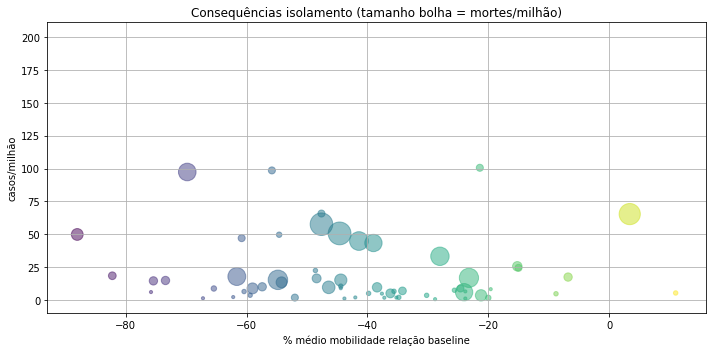

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

df_final.drop(df_final[df_final['country'] == 'Qatar'].index, axis=0, inplace= True)

close = 0.003 * df_final['mean']

df_final['norm_mean'] = (df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max() - df_final['mean'].min())

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(df_final['cases_million'],df_final['deaths_million'], c=close, s=(df_final['norm_mean']*800), alpha=0.5)
ax.scatter(df_final['mean'], df_final['cases_million'], c=close, s=(df_final['deaths_million']*100), alpha=0.5)


ax.set_ylabel('casos/milhão')
ax.set_xlabel('% médio mobilidade relação baseline')
ax.set_title('Consequências isolamento (tamanho bolha = mortes/milhão)')
ax.grid(True)
fig.tight_layout()

plt.show()

In [197]:
df_final['cases_million'].idxmax()

201.1

In [199]:
df_final[df_final.index==13][['mean','cases','cases_million','deaths_million','norm_mean']]

,mean,cases,cases_million,deaths_million,norm_mean
13,-37.6,4774,201.1,0.0,0.509091


## Brasil

In [230]:

df_brasil
df_estados = df[df['country_region']=='Brazil']
df
df_countries = df[df['sub_region_1'].isna()]

,region,state,date,case_day,cases,death_day,deaths,day,%var_case_day,%var_death_day,avg7_cases,avg7_deaths,perc_death,avg7_perc_death
0,Norte,RO,2020-03-20,1,1,0,0,1,0.00,0.0,0.0,0.0,0.00,0.00
1,Norte,RO,2020-03-21,0,1,0,0,2,0.00,0.0,0.0,0.0,0.00,0.00
2,Norte,RO,2020-03-22,2,3,0,0,3,0.00,0.0,0.0,0.0,0.00,0.00
3,Norte,RO,2020-03-23,0,3,0,0,4,-100.00,0.0,0.0,0.0,0.00,0.00
4,Norte,RO,2020-03-24,0,3,0,0,5,0.00,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Centro-Oeste,DF,2020-05-05,50,1818,0,33,60,-57.98,0.0,86.0,0.0,1.82,2.02
1541,Centro-Oeste,DF,2020-05-06,88,1906,1,34,61,76.00,0.0,90.0,0.0,1.78,1.96
1542,Centro-Oeste,DF,2020-05-07,352,2258,1,35,62,300.00,0.0,128.0,0.0,1.55,1.86
1543,Centro-Oeste,DF,2020-05-08,184,2442,2,37,63,-47.73,100.0,139.0,1.0,1.52,1.79


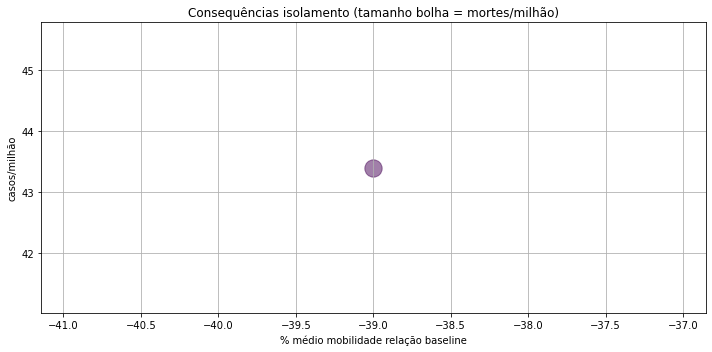

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

df_final.drop(df_final[df_final['country'] != 'Brazil'].index, axis=0, inplace= True)

close = 0.003 * df_final['mean']

df_final['norm_mean'] = (df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max() - df_final['mean'].min())

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(df_final['cases_million'],df_final['deaths_million'], c=close, s=(df_final['norm_mean']*800), alpha=0.5)
ax.scatter(df_final['mean'], df_final['cases_million'], c=close, s=(df_final['deaths_million']*100), alpha=0.5)

ax.set_ylabel('casos/milhão')
ax.set_xlabel('% médio mobilidade relação baseline')
ax.set_title('Consequências isolamento (tamanho bolha = mortes/milhão)')
ax.grid(True)
fig.tight_layout()

plt.show()